In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it
from functions import isingmodel_rev,isingmodel_rev_frac2,construct_ham,construct_distant_ham_2sites
import itertools as it
import qutip as q

In [2]:
def func1(phi,l,lamb):
    
    part1=(lamb-np.cos(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb):
    
    part2=(np.sin(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb))
    
    return integ1[0]-integ2[0]


def assign_g(a,b,lamb):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*gfunc((d-1)//2,lamb)
        elif a%2==0:
            
            return -1j*gfunc(-((d+1)//2),lamb)
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(lam):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,lam)  
    return np.array(mat)

In [3]:
L=3
lambdarange=np.linspace(0.1,2,500)

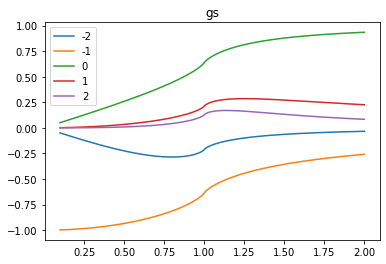

In [4]:
fig,ax=plt.subplots()
for size in range(-L+1,L):
    temp_vec=np.zeros_like(lambdarange)
    for i,lam in enumerate(lambdarange):
        temp_vec[i]=gfunc(size,lam)
    ax.plot(lambdarange,temp_vec,label=size)
plt.title("gs")
plt.legend()
plt.show()

In [5]:
gdic=g_s(lambdarange,L)
autov={}
for i,x in enumerate(lambdarange):
    matr=get_mat(x)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
for k in range(L,2*L):
    plt.plot(lambdarange,autovals[:,k],label=k)
plt.title("eigenvalues corrmat")
plt.legend()
plt.show()

NameError: name 'g_s' is not defined

In [6]:
nus=autovals[:,L:]

figs, axs = plt.subplots(1,sharex=True,figsize=[10,10])

eigrho={}
signs={}
for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
    signarr=np.array(sign)
    signs[j]=signarr
    for i,row in enumerate(nus):
        rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
        eigrho[i,j]=np.prod(rowsign)
for k in range(2**L):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    axs.plot(lambdarange,temp_eigs,label=signs[k])
    axs.legend()
figs.suptitle("3 site theo")

NameError: name 'autovals' is not defined

NameError: name 'g_s' is not defined

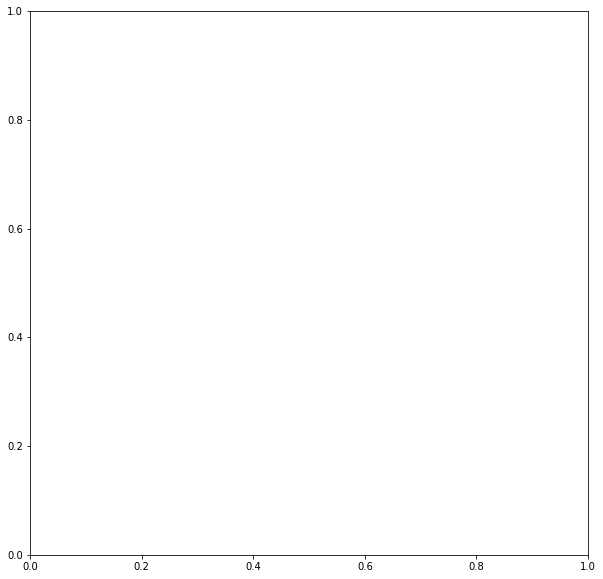

In [7]:
fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])

for L in (2,3,4):
    
    gdic=g_s(lambdarange,L)
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    energies_pass=np.zeros_like(lambdarange)
    energies_antipass=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        rho_anti=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        for i in range(len(eigval)):    
            rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)/(2*abs(h_eigval[0]))
        energies_antipass[j]=(ener_anti)/(2*abs(h_eigval[0]))


    axs.plot(lambdarange,(energies_antipass-energies_pass),label="L={}".format(L))
    axs.set_title("M")
    fig.suptitle(r"N=$\infty$, h=0")
    axs.legend()
plt.show()   

In [ ]:
fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.1,2,500)
for L in range(2,6):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    energies_pass=np.zeros_like(lambdarange)
    energies_antipass=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        rho_anti=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        for i in range(len(eigval)):    
            rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)/(2*abs(h_eigval[0]))
        energies_antipass[j]=(ener_anti)/(2*abs(h_eigval[0]))


    axs.plot(lambdarange,np.gradient(np.gradient(energies_antipass-energies_pass)),label="L={}".format(L))
    axs.set_title("M")
    fig.suptitle(r"N=$\infty$, h=0")
    axs.legend()
plt.show()   

In [ ]:
fig2, axs2 = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.98,1.02,200)
for L in range(2,6):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    energies_pass=np.zeros_like(lambdarange)
    energies_antipass=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        rho_anti=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        for i in range(len(eigval)):    
            rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)/(2*abs(h_eigval[0]))
        energies_antipass[j]=(ener_anti)/(2*abs(h_eigval[0]))

    axs2.plot(lambdarange,np.gradient(np.gradient(energies_antipass-energies_pass)),label="L={}".format(L))
    axs2.set_title("M")
    fig2.suptitle(r"N=$\infty$, h=0")
    axs2.legend()
plt.show()   

In [ ]:
fig2, axs2 = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.98,1.02,200)
for L in range(5,9):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    energies_pass=np.zeros_like(lambdarange)
    energies_antipass=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        rho_anti=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        for i in range(len(eigval)):    
            rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)/(2*abs(h_eigval[0]))
        energies_antipass[j]=(ener_anti)/(2*abs(h_eigval[0]))

    axs2.plot(lambdarange,np.gradient(np.gradient(energies_antipass-energies_pass)),label="L={}".format(L))
    axs2.set_title("M")
    fig2.suptitle(r"N=$\infty$, h=0")
    axs2.legend()
plt.show()   

In [ ]:
fig2, axs2 = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.98,1.02)
for L in range(9,12):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    max_ergos=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval = reduced_H_matr.eigenenergies()

        sortdesc=np.sort(eigval)[::-1]
        
        max_ergo=0
        for n in range(2**L):
            max_ergo+=(eigval[n]-sortdesc[n])*h_eigval[n]

        max_ergos[j]=(max_ergo)/(2*abs(h_eigval[0]))

    axs2.plot(lambdarange,np.gradient(np.gradient(max_ergos)),label="L={}".format(L))
    axs2.set_title("M")
    fig2.suptitle(r"N=$\infty$, h=0")
    axs2.legend()
plt.show()   